# Data Exploration Notebook

This notebook explores the raw data from our LLM-based social network simulation.

In [1]:
import json
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# plt.style.use('seaborn')

## Load Data

In [14]:
carpeta = "simulation_results_20240922_214236"
sufix = "_final"
folder = ""
dir = '../data/'+carpeta+folder

with open(dir+'/network_structure'+sufix+'.json', 'r') as f:
    network_data = json.load(f)

with open(dir+'/agent_data'+sufix+'.json', 'r') as f:
    agent_data = json.load(f)

print(f"Number of agents: {len(agent_data)}")
print(f"Number of connections: {len(network_data['edges'])}")

Number of agents: 10
Number of connections: 84


## Explore Network Structure

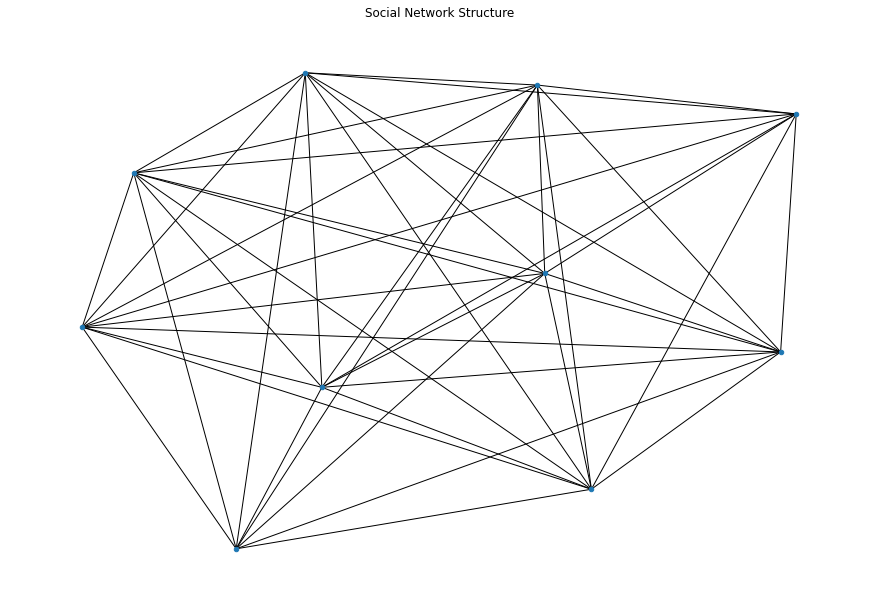

Network density: 0.9778
Average clustering coefficient: 0.9778


In [15]:
G = nx.Graph()
G.add_nodes_from(network_data['nodes'])
G.add_edges_from(network_data['edges'])

plt.figure(figsize=(12, 8))
nx.draw(G, node_size=20, with_labels=False)
plt.title("Social Network Structure")
plt.show()

print(f"Network density: {nx.density(G):.4f}")
print(f"Average clustering coefficient: {nx.average_clustering(G):.4f}")

## Analyze Agent Types

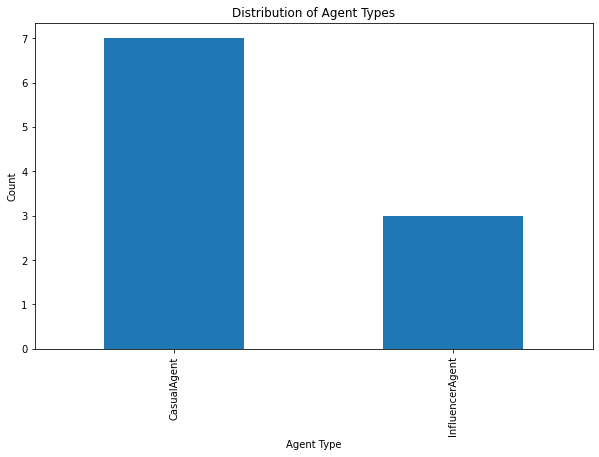

In [16]:
agent_types = [data['type'] for data in agent_data.values()]
type_counts = pd.Series(agent_types).value_counts()

plt.figure(figsize=(10, 6))
type_counts.plot(kind='bar')
plt.title("Distribution of Agent Types")
plt.xlabel("Agent Type")
plt.ylabel("Count")
plt.show()

## Explore Messages

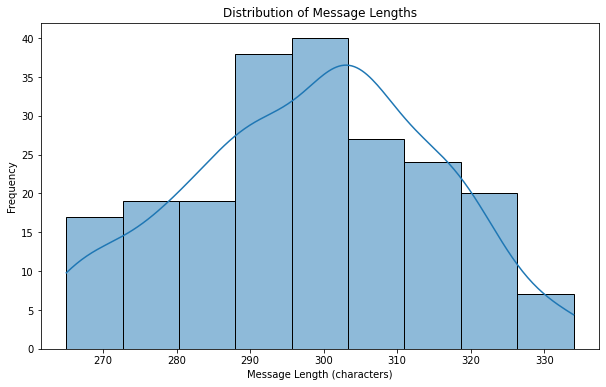

Total messages: 211
Average message length: 298.19 characters


In [17]:
all_messages = [msg for data in agent_data.values() for msg in data['messages']]
message_lengths = [len(msg) for msg in all_messages]

plt.figure(figsize=(10, 6))
sns.histplot(message_lengths, kde=True)
plt.title("Distribution of Message Lengths")
plt.xlabel("Message Length (characters)")
plt.ylabel("Frequency")
plt.show()

print(f"Total messages: {len(all_messages)}")
print(f"Average message length: {sum(message_lengths) / len(message_lengths):.2f} characters")

## Analyze Agent Personalities

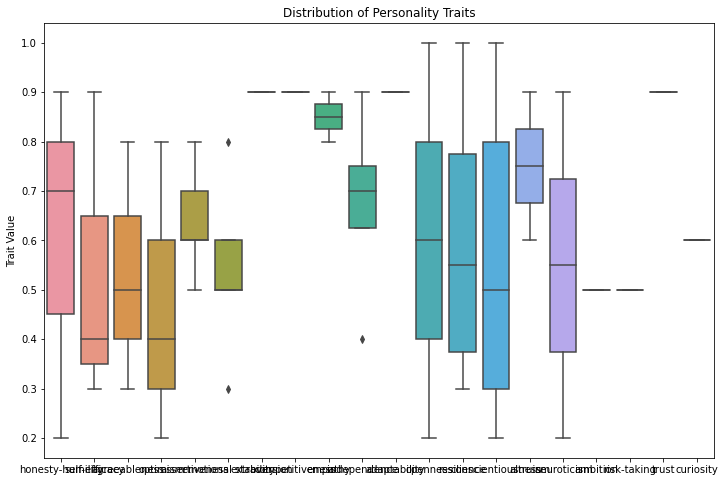

       honesty-humility  self-efficacy  agreeableness  optimism  \
count          3.000000       3.000000       3.000000  3.000000   
mean           0.600000       0.533333       0.533333  0.466667   
std            0.360555       0.321455       0.251661  0.305505   
min            0.200000       0.300000       0.300000  0.200000   
25%            0.450000       0.350000       0.400000  0.300000   
50%            0.700000       0.400000       0.500000  0.400000   
75%            0.800000       0.650000       0.650000  0.600000   
max            0.900000       0.900000       0.800000  0.800000   

       assertiveness  emotional stability  extraversion  competitiveness  \
count       5.000000             5.000000           1.0              1.0   
mean        0.640000             0.540000           0.9              0.9   
std         0.114018             0.181659           NaN              NaN   
min         0.500000             0.300000           0.9              0.9   
25%         0.60

In [18]:
personalities = pd.DataFrame([data['personality'] for data in agent_data.values()])

plt.figure(figsize=(12, 8))
sns.boxplot(data=personalities)
plt.title("Distribution of Personality Traits")
plt.ylabel("Trait Value")
plt.show()

print(personalities.describe())